# Задание.

+ Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
+ Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
+ Разделите данные на выборку для обучения и тестирования
+ Постройте модель LDA
+ Визуализируйте предсказания для тестовой выборки и центры классов
+ Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
+ Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [369]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

### Берем датасет с цветками ириса

In [370]:
df = load_iris()

In [371]:
data = pd.DataFrame(df.data, columns=df.feature_names)

### Оставляем два признака и таргет

In [372]:
data['variety'] = df.target

In [373]:
del data['petal length (cm)']
del data['petal width (cm)']

In [374]:
data.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


### Делим данные на обучение и тест

In [375]:
input_X = data.iloc[:, :2]
output_y = data.iloc[:,-1:]

In [376]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets = df.target
Y=le.fit_transform(targets)

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_X, Y, test_size=0.25)

### Строим модель LDA

In [378]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [379]:
lda = LinearDiscriminantAnalysis()

In [380]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [381]:
y_pred = lda.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2])

In [382]:
from sklearn.metrics import accuracy_score

In [383]:
accuracy_score(y_test, y_pred)

0.7631578947368421

### Визуализируем предсказания для тестовой выборки и центры классов

##### Сначала визуализируем тренировочную выборку

Text(0.5, 1.0, 'Распределение цветков в зависимости от параметров')

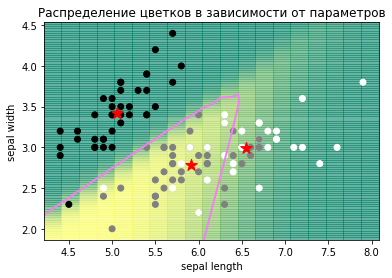

In [384]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, cmap = 'gray')
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 20, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, alpha = 0.6, cmap = 'summer',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading = 'auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='violet')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Распределение цветков в зависимости от параметров')

##### Теперь визуализируем тестовую выборку с предсказанными классами. Центроиды остались с тренировочной выборки!

Text(0.5, 1.0, 'Распределение цветков в зависимости от параметров')

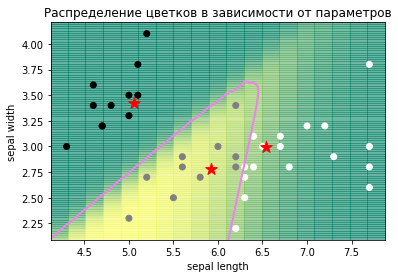

In [385]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred, cmap = 'gray')
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 20, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, alpha = 0.6, cmap = 'summer',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading = 'auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='violet')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Распределение цветков в зависимости от параметров')

+ Как мы увидели на тренировочной выборке, по этим признакам хорошо отделяется левый верхний класс. Линия разделения до определенного момента диагональна - оба признака важны
+ Но этих признаков недостаточно, чтобы разделить остальные 2 класса. На тренировочной выборке мы видим взаимное проникновение классов, тут этого нет, что нвеерно. Видимо, не хватает удаленных признаков

##### Вот как выглядит тестовая выборка с реальными классами, а не предсказанными

Text(0.5, 1.0, 'Распределение цветков в зависимости от параметров')

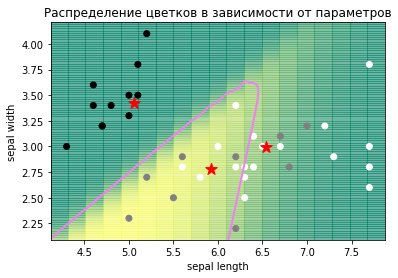

In [386]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, cmap = 'gray')
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 20, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, alpha = 0.6, cmap = 'summer',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading = 'auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='violet')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Распределение цветков в зависимости от параметров')

Видно, что первый класс предсказан идеально, остальные 2 - с ограничениями

### Убираем целевую переменную и оставляем только признаки

In [387]:
data_ = data[['sepal length (cm)','sepal width (cm)']]

### Подбираем число кластеров и визуализируем решение

In [388]:
X = np.array(data_)

In [389]:
from sklearn.preprocessing import StandardScaler

In [390]:
scaler = StandardScaler()

In [391]:
X_scaled = scaler.fit_transform(X)

Проверем данные после стандартизации

Text(0.5, 1.0, 'Распределение цветков в зависимости от параметров')

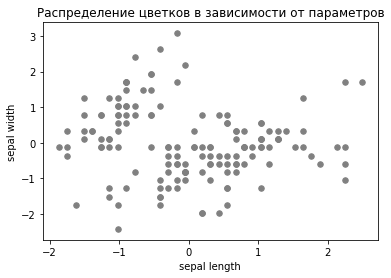

In [392]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = 'gray', s=30)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Распределение цветков в зависимости от параметров')

In [393]:
from sklearn.cluster import KMeans

In [394]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

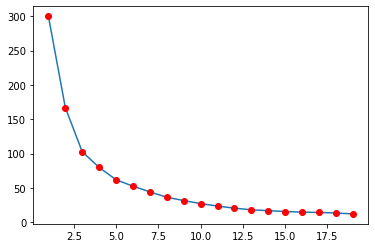

In [395]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Ожидаемо 3-й класс дает хороший прирост, а дальше прирост замедляется. Оставим 3 класса

In [396]:
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(X_scaled)

Text(0.5, 1.0, 'Распределение цветков в зависимости от параметров')

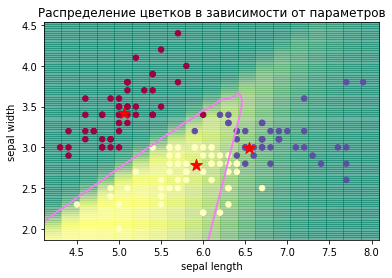

In [397]:
# сам scatter plot
plt.scatter(X[:, 0], X[:, 1], cmap='Spectral', c=clusters, s=30)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 20, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, alpha = 0.6, cmap = 'summer',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading = 'auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='violet')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Распределение цветков в зависимости от параметров')

Получилось хорошо. 

Бросается в глаза цветок в левом нижнем углу, который должен быть красным и отсутствие взаимного проникновения желтого и синего секторов, но как написано выше для их разделения нужны дополнительные признаки! 

Красный сектор выделен явно